# Effective Coverage Optimization vs. Composite Lives Saved: a Comparison

In this document, we will find the optimal set of nutritional interventions over space and time, first using each micronutrient's effect on effective coverage separately, and then using all interventions together to see if they yield different optimal results.

In Section 1, we will show a summary table of optimally chosen interventions, their cumulative benefits over time, highlighting differences. In the sections following that, we will visualize the results a more in-depth.

## Summary of Results

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import import_ipynb
import optimization_work.demewoz_lives_saved.lives_saved_analysis as lives_saved
import optimization_work.demewoz_lives_saved.folate_effective_coverage_analysis as folate
import optimization_work.demewoz_lives_saved.zinc_effective_coverage_analysis as zinc
import optimization_work.demewoz_lives_saved.vas_effective_coverage_analysis as vas
import pandas as pd


importing Jupyter notebook from /home/lordflaron/Documents/minimod/optimization_work/demewoz_lives_saved/lives_saved_analysis.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
.pipe(observation_adjustment,
int1 = "cube",
int2 = 0,
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "cubezcube",
int2 = 0,
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "maxoilcube",
int2 = "maxoil",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "oilcube",
int2 = "oil",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "oilcubevas",
int2 = "oilvas",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "maxoilcubevas",
int2 = "maxoilvas",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "cubevas",
int2 = "vas",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "cubeclinic",
int2 = "clinic",
time_to_replace = [1,2,3])
.pipe(observation_adjustment,
int1 = "maxoilcub

interactive(children=(Dropdown(description='col', options=('lives_saved', 'lives_saved_high'), value='lives_sa…

interactive(children=(Dropdown(description='col', options=('lives_saved', 'lives_saved_high'), value='lives_sa…

interactive(children=(Dropdown(description='col', options=('lives_saved', 'lives_saved_high'), value='lives_sa…

importing Jupyter notebook from /home/lordflaron/Documents/minimod/optimization_work/demewoz_lives_saved/folate_effective_coverage_analysis.ipynb
Changed fcube to 0
Changed fflour to fflour33
[Note]: Processing Data...
[Note]: Creating Base Model with constraints

                MiniMod Nutrition Intervention Tool
                Optimization Method: MIN
                Version: 0.0.6dev
                Solver: CBC,
                Show Output: True
                
                
[Note]: Optimizing...
[Note]: Optimal Solution Found
+----------------------------+----------------------------+
| MiniMod Solver Results     |                            |
| Method:                    | MIN                        |
| Solver:                    | CBC                        |
| Optimization Status:       | OptimizationStatus.OPTIMAL |
| Number of Solutions Found: | 1                          |
+----------------------------+----------------------------+
+-----------------------------+------+

ValueError: None cannot be transformed to a widget

In [3]:
# First only get the optimal values
lives_saved_opt = lives_saved.models['lives_saved'][None].opt_df.loc[lambda df: df['opt_vals']>0].groupby(['region','time']).sum()[['cumulative_benefits', 'cumulative_costs']].assign(bau_cost_per_ben =  lives_saved.models['lives_saved'][None].cost_per_benefit/3)
lives_saved_high_opt = lives_saved.models['lives_saved_high'][None].opt_df.loc[lambda df: df['opt_vals']>0].groupby(['region','time']).sum()[['cumulative_benefits', 'cumulative_costs']].assign(bau_cost_per_ben =  lives_saved.models['lives_saved_high'][None].cost_per_benefit/3)
zinc_opt = zinc.models[None].opt_df.loc[lambda df: df['opt_vals']>0].groupby(['region','time']).sum()[['cumulative_benefits', 'cumulative_costs']].assign(bau_cost_per_ben =  zinc.models[None].cost_per_benefit/3)
vas_opt = vas.models[None].opt_df.loc[lambda df: df['opt_vals']>0].groupby(['region','time']).sum()[['cumulative_benefits', 'cumulative_costs']].assign(bau_cost_per_ben =  vas.models[None].cost_per_benefit/3)
folate_opt = folate.models[None].opt_df.loc[lambda df: df['opt_vals']>0].groupby(['region','time']).sum()[['cumulative_benefits', 'cumulative_costs']].assign(bau_cost_per_ben =  folate.models[None].cost_per_benefit/3)

# Get names of optimal interventions
lives_saved_name = lives_saved.models['lives_saved'][None].optimal_interventions
lives_saved_high_name = lives_saved.models['lives_saved_high'][None].optimal_interventions
zinc_name = zinc.models[None].optimal_interventions
vas_name = vas.models[None].optimal_interventions
folate_name = folate.models[None].optimal_interventions

# Get names of BAU
lives_saved_bau = lives_saved.models['lives_saved'][None].bau_df.index.get_level_values(level='intervention').unique().tolist()
lives_saved_high_bau = lives_saved.models['lives_saved_high'][None].bau_df.index.get_level_values(level='intervention').unique().tolist()
zinc_bau = zinc.models[None].bau_df.index.get_level_values(level='intervention').unique().tolist()
vas_bau = vas.models[None].bau_df.index.get_level_values(level='intervention').unique().tolist()
folate_bau = folate.models[None].bau_df.index.get_level_values(level='intervention').unique().tolist()

opt_dict = {'Zinc (Children EC)' : zinc_opt,
'VA (Children EC)' : vas_opt,
'Folic Acid (WRA EC)' : folate_opt,
'All (LS)' : lives_saved_opt,
'All (LS, Alt.)' : lives_saved_high_opt}

df_all = pd.concat(opt_dict.values(), axis=1)

df_all.columns = pd.MultiIndex.from_product([opt_dict.keys(), ['Benefits', 'Costs ($)', 'BAU Cost per Benefit']])

In [4]:
df_all

Zinc (Children EC)                                     \
                      Benefits     Costs ($) BAU Cost per Benefit   
region time                                                         
Cities 1          3.241906e+05  1.930955e+05             0.226733   
       2          6.577216e+05  3.271474e+05             0.226733   
       3          1.000750e+06  5.774632e+05             0.226733   
       4          1.353263e+06  8.070334e+05             0.226733   
       5          1.715039e+06  1.072751e+06             0.226733   
       6          2.085474e+06  1.333077e+06             0.226733   
       7          2.464257e+06  1.572775e+06             0.226733   
       8          2.851168e+06  1.815931e+06             0.226733   
       9          3.245899e+06  2.086627e+06             0.226733   
       10         3.648096e+06  2.369630e+06             0.226733   
North  1          2.220400e+05  1.167978e+05             0.226733   
       2          4.456754e+05  1.978819e+05             0.226733   
       3          6.710522e+05  3.492907e+05             0.226733   
       4          8.987473e+05  4.881511e+05             0.226733   
       5          1.129435e+06  6.488761e+05             0.226733   
       6          1.363487e+06  8.063393e+05             0.226733   
       7          1.601458e+06  9.513260e+05             0.226733   
       8          1.843691e+06  1.098404e+06             0.226733   
       9          2.090433e+06  1.262140e+06             0.226733   
       10         2.342109e+06  1.433321e+06             0.226733   
South  1          2.873404e+05  1.846996e+05             0.226733   
       2          5.762073e+05  3.129229e+05             0.226733   
       3          8.665353e+05  5.523549e+05             0.226733   
       4          1.158385e+06  7.719434e+05             0.226733   
       5          1.451755e+06  1.026108e+06             0.226733   
       6          1.746279e+06  1.275114e+06             0.226733   
       7          2.041847e+06  1.504390e+06             0.226733   
       8          2.338303e+06  1.736974e+06             0.226733   
       9          2.635407e+06  1.995900e+06             0.226733   
       10         2.932984e+06  2.266598e+06             0.226733   

            VA (Children EC)                                     \
                    Benefits     Costs ($) BAU Cost per Benefit   
region time                                                       
Cities 1        2.310091e+06  4.464041e+06             0.799139   
       2        2.562092e+06  5.236413e+06             0.799139   
       3        1.727849e+05  2.378696e+05             0.799139   
       4        4.247663e+05  6.971387e+05             0.799139   
       5        6.833687e+05  1.165025e+06             0.799139   
       6        9.481614e+05  1.655946e+06             0.799139   
       7        1.218921e+06  2.141340e+06             0.799139   
       8        1.495491e+06  2.655179e+06             0.799139   
       9        1.777651e+06  3.172774e+06             0.799139   
       10       2.065147e+06  3.685109e+06             0.799139   
North  1        7.291506e+05  1.224056e+06             0.799139   
       2        1.463540e+06  2.435866e+06             0.799139   
       3        2.203649e+06  3.696485e+06             0.799139   
       4        3.048324e+06  5.303536e+06             0.799139   
       5        3.904101e+06  6.922812e+06             0.799139   
       6        4.772358e+06  8.576913e+06             0.799139   
       7        5.655156e+06  1.022093e+07             0.799139   
       8        6.553760e+06  1.190817e+07             0.799139   
       9        7.469092e+06  1.359980e+07             0.799139   
       10       8.402731e+06  1.528160e+07             0.799139   
South  1        2.972612e+06  6.328509e+06             0.799139   
       2        3.345486e+06  7.872090e+06             0.799139   
       3        1.451640e+05  2.229739e+05             0.79

In [4]:
df_all

Zinc (Children EC)                                     \
                      Benefits     Costs ($) BAU Cost per Benefit   
region time                                                         
Cities 1          3.241906e+05  1.930955e+05             0.226733   
       2          6.577216e+05  3.271474e+05             0.226733   
       3          1.000750e+06  5.774632e+05             0.226733   
       4          1.353263e+06  8.070334e+05             0.226733   
       5          1.715039e+06  1.072751e+06             0.226733   
       6          2.085474e+06  1.333077e+06             0.226733   
       7          2.464257e+06  1.572775e+06             0.226733   
       8          2.851168e+06  1.815931e+06             0.226733   
       9          3.245899e+06  2.086627e+06             0.226733   
       10         3.648096e+06  2.369630e+06             0.226733   
North  1          2.220400e+05  1.167978e+05             0.226733   
       2          4.456754e+05  1.978819e+05             0.226733   
       3          6.710522e+05  3.492907e+05             0.226733   
       4          8.987473e+05  4.881511e+05             0.226733   
       5          1.129435e+06  6.488761e+05             0.226733   
       6          1.363487e+06  8.063393e+05             0.226733   
       7          1.601458e+06  9.513260e+05             0.226733   
       8          1.843691e+06  1.098404e+06             0.226733   
       9          2.090433e+06  1.262140e+06             0.226733   
       10         2.342109e+06  1.433321e+06             0.226733   
South  1          2.873404e+05  1.846996e+05             0.226733   
       2          5.762073e+05  3.129229e+05             0.226733   
       3          8.665353e+05  5.523549e+05             0.226733   
       4          1.158385e+06  7.719434e+05             0.226733   
       5          1.451755e+06  1.026108e+06             0.226733   
       6          1.746279e+06  1.275114e+06             0.226733   
       7          2.041847e+06  1.504390e+06             0.226733   
       8          2.338303e+06  1.736974e+06             0.226733   
       9          2.635407e+06  1.995900e+06             0.226733   
       10         2.932984e+06  2.266598e+06             0.226733   

            VA (Children EC)                                     \
                    Benefits     Costs ($) BAU Cost per Benefit   
region time                                                       
Cities 1        2.449440e+05  7.789319e+05             0.799139   
       2        4.969452e+05  1.551304e+06             0.799139   
       3        1.727849e+05  2.378696e+05             0.799139   
       4        4.247663e+05  6.971387e+05             0.799139   
       5        6.833687e+05  1.165025e+06             0.799139   
       6        9.481614e+05  1.655946e+06             0.799139   
       7        1.218921e+06  2.141340e+06             0.799139   
       8        1.495491e+06  2.655179e+06             0.799139   
       9        1.777651e+06  3.172774e+06             0.799139   
       10       2.065147e+06  3.685109e+06             0.799139   
North  1        7.291506e+05  1.224056e+06             0.799139   
       2        1.463540e+06  2.435866e+06             0.799139   
       3        2.203649e+06  3.696485e+06             0.799139   
       4        3.048324e+06  5.303536e+06             0.799139   
       5        3.904101e+06  6.922812e+06             0.799139   
       6        4.772358e+06  8.576913e+06             0.799139   
       7        5.655156e+06  1.022093e+07             0.799139   
       8        6.553760e+06  1.190817e+07             0.799139   
       9        7.469092e+06  1.359980e+07             0.799139   
       10       8.402731e+06  1.528160e+07             0.799139   
South  1        3.709037e+05  1.558544e+06             0.799139   
       2        7.437777e+05  3.102125e+06             0.799139   
       3        1.451640e+05  2.229739e+05             0.79

*@tbl:opt_int shows an overview of the optimal interventions chosen for each micronutrient simulation as well as each . Each intervention is fortified at 100%, unless otherwise stated.

The Business as Usual Scenario (BAU*) was chosen for each simulation so that it would be consistent across effective coverage and lives saved simulations. In the case of the micronutrient effective coverage simulations, the optimal solution is the BAU* scenario for zinc and folic acid. For vitamin A intervention, in contrast to the BAU* scenario, fortified boullion cube is also chosen.

When we consider all interventions together, however, the optimal choice becomes different than the BAU* (which is just a composite of the micronutrient scenarios' BAU*).[^1] In contrast to the BAU*, the optimally chosen set of interventions may not include VAS campaign, as well and include an addition of folic acid fortified boullion cube. Also, folic acid fortified flour is included at 100%, not 33%.

Note that, although some of the interventions chosen optimally are the same as in the BAU*, the timing and spatial distribution of each intervention may not be the same. Since MINIMOD chooses the optimal set of interventions across space and time, it may be that the appearance of an intervention may happen earlier or later in time than others and may only occur in certain parts of the country.

[^1]: Notice that there are two alternative definitions for the lives saved estimates of each nutritional intervention. The resulting optimally chosen interventions are similar, but the alternative specification includes VAS campaign as well.



In [5]:
opt_int_dict = dict.fromkeys(opt_dict)

long_names_opt = ['Zinc Fortified Flour', 'VA Fortified Oil (75%) + VAS Campaign + VA Fortified Boullion Cube', 'Folic Acid Fortified Flour (33%)','Same as BAU* - VAS Campaign + Folic Acid Fortified Cube, Folic Acid Fortified Flour', 'Same as BAU* + Folic Acid Fortified Cube, Folic Acid Fortified Flour']

long_names_bau = []

for key, value in zip(opt_int_dict, long_names_opt):
    
    opt_int_dict[key] = value

df_int_opt = pd.DataFrame(index = opt_int_dict.keys(), data = opt_int_dict.values(), columns = ['Optimal Chosen'])


In [6]:
df_int_opt['BAU*'] = ['Zinc Fortified Flour', 'VA Fortified Oil (75%) + VAS Campaign', 'Folic Acid Fortified Flour (33%)','VA Fortified Oil (75%), VAS Campaign, Zinc Fortified Flour, Folic Acid Fortified Flour (33%)', 'Same as above']

In [78]:
df_int_opt.to_markdown()

'|                     | Optimal Chosen                                                                      | BAU*                                                                                         |\n|:--------------------|:------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------|\n| Zinc (Children EC)  | Zinc Fortified Flour                                                                | Zinc Fortified Flour                                                                         |\n| VA (Children EC)    | VA Fortified Oil (75%) + VAS Campaign + VA Fortified Boullion Cube                  | VA Fortified Oil (75%) + VAS Campaign                                                        |\n| Folic Acid (WRA EC) | Folic Acid Fortified Flour (33%)                                                    | Folic Acid Fortified Flour (33%)                                 

We can also see the differences in how each region is affected after 10 years in terms of accumulated benefits and costs. 

In [6]:
df_all.index.names = ['Region', 'Time']


latex_table = (df_all
.loc[(slice(None), 10), :]
.reset_index(level='Time', drop=True)
.T
# .loc[(slice(None), ['CB', 'CC']), :]
.assign(National = lambda df: df['North'] + df['South'] + df['Cities'],
    **{'% North' : lambda df: df['North']/df['National'],
    '% South' : lambda df: df['South']/df['National'],
    '% Cities' : lambda df: df['Cities']/df['National']})
[['% North', '% South', '% Cities', 'National']]
.applymap(lambda x: "{:,.2f}".format(x))
.to_latex( multirow=True, caption = 'Optimal Cumulative Benefits (CB) and Costs (CC), Across Space', label = 'tbl:opt_space', index_names=False)
)

note = '\\multicolumn{6}{p{.8\\textwidth}}{Notes. Lorem ipsum ...}\n'
ending = '\\end{tabular}\n\\end{table}\n'

print(latex_table.replace(ending, note+ending))

\begin{table}
\centering
\caption{Optimal Cumulative Benefits (CB) and Costs (CC), Across Space}
\label{tbl:opt_space}
\begin{tabular}{llllll}
\toprule
               & Region & \% North & \% South & \% Cities &       National \\
\midrule
\multirow{3}{*}{Zinc (Children EC)} & Benefits &    0.26 &    0.33 &     0.41 &   8,923,189.41 \\
               & Costs (\$) &    0.24 &    0.37 &     0.39 &   6,069,548.82 \\
               & BAU Cost per Benefit &    0.33 &    0.33 &     0.33 &           0.68 \\
\cline{1-6}
\multirow{3}{*}{VA (Children EC)} & Benefits &    0.64 &    0.20 &     0.16 &  13,069,585.95 \\
               & Costs (\$) &    0.64 &    0.20 &     0.16 &  23,736,675.25 \\
               & BAU Cost per Benefit &    0.33 &    0.33 &     0.33 &           2.40 \\
\cline{1-6}
\multirow{3}{*}{Folic Acid (WRA EC)} & Benefits &    0.18 &    0.33 &     0.49 &  17,096,476.30 \\
               & Costs (\$) &    0.24 &    0.37 &     0.39 &   1,550,946.68 \\
               & BAU Cost per

In [5]:
df_opt_time = df_all


print(opt_dict.keys())

# df_opt_time.loc[:, (slice(None), ['Benefits'])].rename({k:k.replace('\n', ' ') for k in opt_dict.keys()}, level=0)
df_opt_time
# print(df_opt_time[:, (slice(None), ['Benefits', 'Costs ($)'])].to_latex(multicolumn=True, bold_rows=True, caption = 'Optimal Cumulative Benefits and Costs over Time', label = 'tbl:opt_time'))

dict_keys(['Zinc (Children EC)', 'VA (Children EC)', 'Folic Acid (WRA EC)', 'All (LS)', 'All (LS, Alt.)'])


Zinc (Children EC)                                     \
                      Benefits     Costs ($) BAU Cost per Benefit   
region time                                                         
Cities 1          3.241906e+05  1.930955e+05             0.226733   
       2          6.577216e+05  3.271474e+05             0.226733   
       3          1.000750e+06  5.774632e+05             0.226733   
       4          1.353263e+06  8.070334e+05             0.226733   
       5          1.715039e+06  1.072751e+06             0.226733   
       6          2.085474e+06  1.333077e+06             0.226733   
       7          2.464257e+06  1.572775e+06             0.226733   
       8          2.851168e+06  1.815931e+06             0.226733   
       9          3.245899e+06  2.086627e+06             0.226733   
       10         3.648096e+06  2.369630e+06             0.226733   
North  1          2.220400e+05  1.167978e+05             0.226733   
       2          4.456754e+05  1.978819e+05             0.226733   
       3          6.710522e+05  3.492907e+05             0.226733   
       4          8.987473e+05  4.881511e+05             0.226733   
       5          1.129435e+06  6.488761e+05             0.226733   
       6          1.363487e+06  8.063393e+05             0.226733   
       7          1.601458e+06  9.513260e+05             0.226733   
       8          1.843691e+06  1.098404e+06             0.226733   
       9          2.090433e+06  1.262140e+06             0.226733   
       10         2.342109e+06  1.433321e+06             0.226733   
South  1          2.873404e+05  1.846996e+05             0.226733   
       2          5.762073e+05  3.129229e+05             0.226733   
       3          8.665353e+05  5.523549e+05             0.226733   
       4          1.158385e+06  7.719434e+05             0.226733   
       5          1.451755e+06  1.026108e+06             0.226733   
       6          1.746279e+06  1.275114e+06             0.226733   
       7          2.041847e+06  1.504390e+06             0.226733   
       8          2.338303e+06  1.736974e+06             0.226733   
       9          2.635407e+06  1.995900e+06             0.226733   
       10         2.932984e+06  2.266598e+06             0.226733   

            VA (Children EC)                                     \
                    Benefits     Costs ($) BAU Cost per Benefit   
region time                                                       
Cities 1        2.310091e+06  4.464041e+06             0.799139   
       2        2.562092e+06  5.236413e+06             0.799139   
       3        1.727849e+05  2.378696e+05             0.799139   
       4        4.247663e+05  6.971387e+05             0.799139   
       5        6.833687e+05  1.165025e+06             0.799139   
       6        9.481614e+05  1.655946e+06             0.799139   
       7        1.218921e+06  2.141340e+06             0.799139   
       8        1.495491e+06  2.655179e+06             0.799139   
       9        1.777651e+06  3.172774e+06             0.799139   
       10       2.065147e+06  3.685109e+06             0.799139   
North  1        7.291506e+05  1.224056e+06             0.799139   
       2        1.463540e+06  2.435866e+06             0.799139   
       3        2.203649e+06  3.696485e+06             0.799139   
       4        3.048324e+06  5.303536e+06             0.799139   
       5        3.904101e+06  6.922812e+06             0.799139   
       6        4.772358e+06  8.576913e+06             0.799139   
       7        5.655156e+06  1.022093e+07             0.799139   
       8        6.553760e+06  1.190817e+07             0.799139   
       9        7.469092e+06  1.359980e+07             0.799139   
       10       8.402731e+06  1.528160e+07             0.799139   
South  1        2.972612e+06  6.328509e+06             0.799139   
       2        3.345486e+06  7.872090e+06             0.799139   
       3        1.451640e+05  2.229739e+05             0.79

In [11]:
cpb = df_all.loc[(slice(None), 10), :].sum().unstack().assign(cost_per_benefit = lambda df: df['Costs ($)']/df['Benefits'])[['BAU Cost per Benefit', 'cost_per_benefit']].rename({'cost_per_benefit' : 'Optimal Cost per Benefit'}, axis=1)

In [12]:
all_ls.assign(perc_change= lambda df: (df['BAU Cost per Benefit'] - df['Optimal Cost per Benefit'])/df['BAU Cost per Benefit'])

NameError: name 'all_ls' is not defined

Text(0.5, 1.0, 'Effective Coverage')

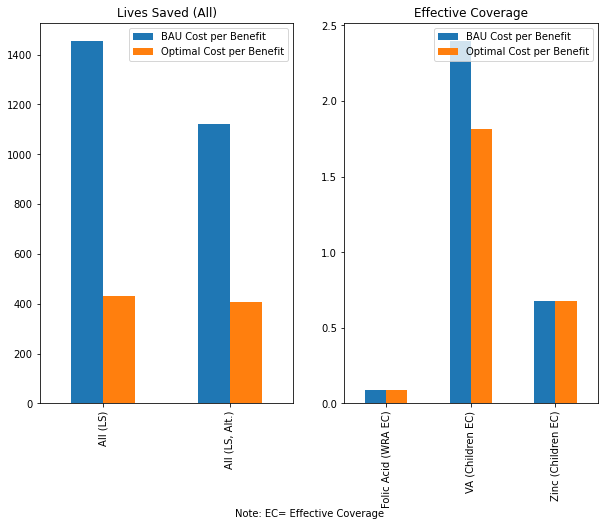

In [49]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,8))
all_ls = cpb.loc[cpb.index.str.contains('All')].assign(perc_change= lambda df: (df['BAU Cost per Benefit'] - df['Optimal Cost per Benefit'])/df['BAU Cost per Benefit'])
all_ls[['BAU Cost per Benefit', 'Optimal Cost per Benefit']].plot.bar(ax=ax1)
eff_cov = cpb.loc[~cpb.index.str.contains('All')].assign(perc_change= lambda df: (df['BAU Cost per Benefit'] - df['Optimal Cost per Benefit'])/df['BAU Cost per Benefit'])
eff_cov[['BAU Cost per Benefit', 'Optimal Cost per Benefit']].plot.bar(ax=ax2)

fig.text(.5,-.1, "Note: EC= Effective Coverage", ha='center')


ax1.set_title("Lives Saved (All)")
ax2.set_title("Effective Coverage")


In [14]:
import geopandas as gpd
# Load data
geo_df = gpd.read_file("examples/data/maps/cameroon/CAM.shp")

# Now we create the boundaries for North, South and Cities
# Based on "Measuring Costs of Vitamin A..., Table 2"
north = r"Adamaoua|Nord|Extreme-Nord"
south = r"Centre|Est|Nord-Ouest|Ouest|Sud|Sud-Ouest"
cities= r"Littoral" # Duala
# Yaounde is in Mfoundi
geo_df.loc[lambda df: df['ADM1'].str.contains(north), 'space'] = 'North'
geo_df.loc[lambda df: df['ADM1'].str.contains(south), 'space'] = 'South'
geo_df.loc[lambda df: df['ADM1'].str.contains(cities), 'space'] = 'Cities'
geo_df.loc[lambda df: df['ADM2'].str.contains(r"Mfoundi"), 'space'] = 'Cities'

# Now we aggregate the data to the `space` variable
agg_geo_df = geo_df.dissolve(by = 'space')

zinc_opt

cumulative_benefits  cumulative_costs  bau_cost_per_ben
Region Time                                                         
Cities 1            3.241906e+05      1.930955e+05          0.226733
       2            6.577216e+05      3.271474e+05          0.226733
       3            1.000750e+06      5.774632e+05          0.226733
       4            1.353263e+06      8.070334e+05          0.226733
       5            1.715039e+06      1.072751e+06          0.226733
       6            2.085474e+06      1.333077e+06          0.226733
       7            2.464257e+06      1.572775e+06          0.226733
       8            2.851168e+06      1.815931e+06          0.226733
       9            3.245899e+06      2.086627e+06          0.226733
       10           3.648096e+06      2.369630e+06          0.226733
North  1            2.220400e+05      1.167978e+05          0.226733
       2            4.456754e+05      1.978819e+05          0.226733
       3            6.710522e+05      3.492907e+05          0.226733
       4            8.987473e+05      4.881511e+05          0.226733
       5            1.129435e+06      6.488761e+05          0.226733
       6            1.363487e+06      8.063393e+05          0.226733
       7            1.601458e+06      9.513260e+05          0.226733
       8            1.843691e+06      1.098404e+06          0.226733
       9            2.090433e+06      1.262140e+06          0.226733
       10           2.342109e+06      1.433321e+06          0.226733
South  1            2.873404e+05      1.846996e+05          0.226733
       2            5.762073e+05      3.129229e+05          0.226733
       3            8.665353e+05      5.523549e+05          0.226733
       4            1.158385e+06      7.719434e+05          0.226733
       5            1.451755e+06      1.026108e+06          0.226733
       6            1.746279e+06      1.275114e+06          0.226733
       7            2.041847e+06      1.504390e+06          0.226733
       8            2.338303e+06      1.736974e+06          0.226733
       9            2.635407e+06      1.995900e+06          0.226733
       10           2.932984e+06      2.266598e+06          0.226733

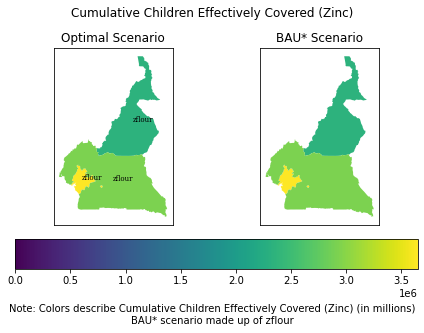

In [75]:

z = zinc.models[None].plot_map_benchmark(intervention = None, 
time = 10, 
optimum_interest = 'cb', 
bench_intervention = 'zflour',
map_df = agg_geo_df,
merge_key = 'space',
intervention_in_title = False,
intervention_bubbles= True,
intervention_bubble_names = ['zflour'],
millions = True,
save = 'optimization_work/demewoz_lives_saved/reports/multi_mn_plus_lives_saved/zinc10.png')



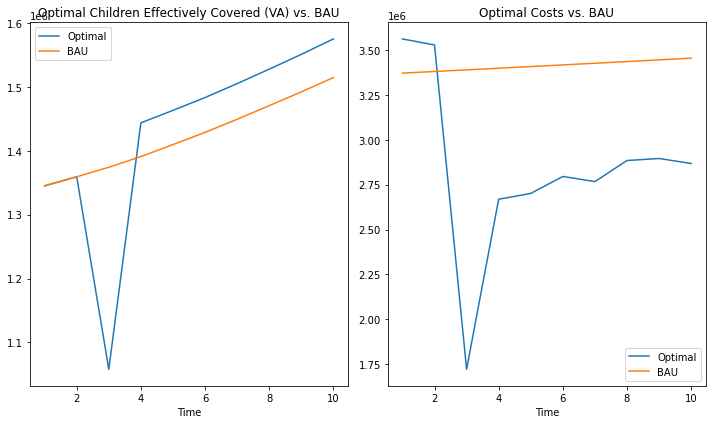

In [16]:
fig, (ax1, ax2)  = plt.subplots(1,2, figsize = (10,6))

vas.models[None].plot_bau_time('b', ax=ax1)
vas.models[None].plot_bau_time('c', ax=ax2)
plt.tight_layout()